In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import linalg

## Quadratic Form (Algebra)

$w^T_{1 x m}\;.\;S_{m x m}\;.\;w_{m x 1}\;\;\;\;\;\;\;\;$
* (only applies to square matrices)
<br>

* If S = $\;\begin{bmatrix} a & b \\ c & d\end{bmatrix}$ and w = $\;\begin{bmatrix} x \\ y \end{bmatrix}$, then 
$$\;\;\;\;\;\;\;\;\;\;\;w^T\;.\;S\;.\;w \;=\; ax^2 + (b\;+\;c)xy + dy^2\;\;\;\;\;\;\; <----    \;(quadratic\;equation)$$


* If S is an identity matrix (putting a & d = 1, and b & c = 0 in the above equation, we get the quadratic form as $x^2 + y^2$
<br><br>

[[117]] 




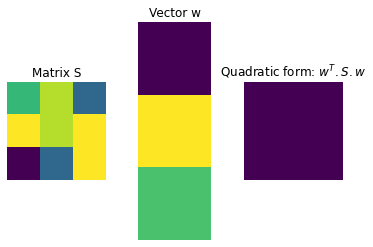

In [2]:
# matrix
S = [ [ 1,  3, -2], 
      [ 4,  3,  4],
      [-5, -2,  4] ]

# vector (column)
w = np.transpose([ [-2, 5, 3] ])

# compute the quadratic form
qf = w.T @ S @w

print(qf, "\n\n")

n = len(w) # used for plotting

# plotting
plt.subplot(131)
plt.imshow(S)
plt.axis('off')
plt.title('Matrix S')

plt.subplot(132)
plt.imshow(w)
plt.axis('off')
plt.title('Vector w')

plt.subplot(133)
plt.imshow(qf)
plt.title('Quadratic form: $w^T.S.w$')
plt.axis('off')

plt.show()
print("\n\n")

## Quadratic Form (Geometry)

$\;\;f(S, w)  =  \;w^T.S.w\;  =  \;\epsilon $

* If we plot the f(S, $w_{i, j}$) for every w$_i$ and w$_j$, with f(S, $w_{i, j}$), w$_i$ and w$_j$ being the axes, we will get a surface for that particular matrix S
<br>

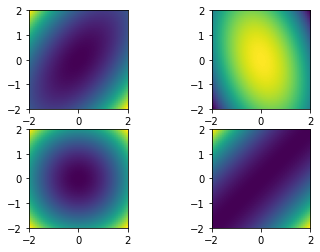

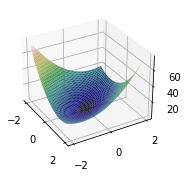

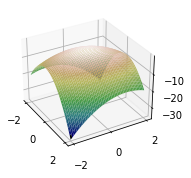

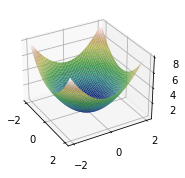

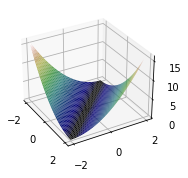

In [3]:
# some different matrices
S = np.zeros(4, dtype = object)

S[0] = [ [ 5, 3], [4, 7] ]
S[1] = [ [-2,-1], [3,-5] ]
S[2] = [ [ 1, 0], [0, 1] ]
S[3] = [ [ 1, 1], [1, 1] ]

# range for vector w
n = 50
w_Range = np.linspace(-2, 2, n)

# initialize quadratic form matrix
qf = np.zeros((n, n))


for i in range(4):
    # compute QF
    for xi in range(n):
        for yi in range(n):
            # w vector
            w = np.transpose([ w_Range[xi], w_Range[yi] ])
            
            # QF
            qf[xi, yi] = w.T @ S[i] @ w
    
    # show the map
    plt.subplot(2, 2, i+1)
    plt.imshow(qf, extent = [w_Range[0], w_Range[-1], w_Range[0], w_Range[-1]])

plt.show()
print("\n\n")


# 3D plotting
mycmap = plt.get_cmap('gist_earth')
X, Y = np.meshgrid(w_Range, w_Range)

# we have 4 matrices
for i in range(4):
    # we have to go over "n" w vectors
    for xi in range(n):
        for yi in range(n):
            w = np.array([ w_Range[xi], w_Range[yi] ])
            qf[xi, yi] = w.T @ S[i] @ w
    
    # show the map 
    fig = plt.figure(figsize=(10, 6))
    ax1 = fig.add_subplot(221 + i, projection = '3d')
    surf1 = ax1.plot_surface(X, Y, qf, cmap= mycmap)
    ax1.view_init(azim=-30, elev=30)

plt.show()
print("\n\n")

## Normalized Quadratic Form
<br>
$\; \underline{w^T\;.\;S\;.\;w}$

$\;\;\; w^T\;.\;w$

or
<br>
$\; \underline{ax^2 + (b\;+\;c)xy + dy^2}$

$\;\;\; x^2 + y^2 $
<br>

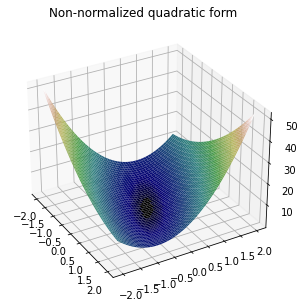

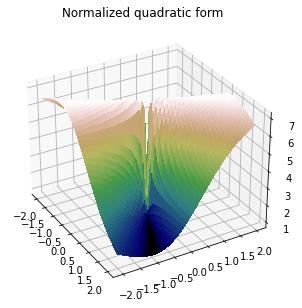

In [4]:
M = np.array([[2, 3], [2, 6]])
n = 50
xi = np.linspace(-2, 2, n)

X, Y = np.meshgrid(xi, xi)

qf = np.zeros((n, n))
qf_norm = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        # create a x, y coordinate column vector
        v = np.transpose([xi[i], xi[j]])

        # compute the quadratic forms
        qf[i,j]  = v.T @ M @v
        qf_norm[i,j] = qf[i,j] / (v.T @ v)
        
        
mycmap = plt.get_cmap('gist_earth')      

fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111, projection='3d')
surface1 = ax1.plot_surface(X, Y, qf.T, cmap = mycmap)
ax1.view_init(azim=-30, elev=30)
ax1.set_title('Non-normalized quadratic form')

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111, projection='3d')
surface2 = ax1.plot_surface(X, Y, qf_norm.T, cmap= mycmap, antialiased=False)
ax1.view_init(azim=-30, elev=30)
ax1.set_title('Normalized quadratic form')

plt.show()
print("\n\n")

## Eigenvectors and the Quadratic form surface

* Eigenvectors of a **symmetric matrices** points along the ridges and the valleys of a normalized quadratic form surface

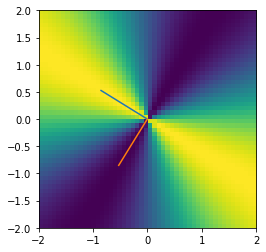

In [5]:
# a symmetric matrix
M = [ [1, 2], [2, 3] ]

# range for vector w
n = 50
w_range = np.linspace(-2, 2, n)

# initialize quadratic form matrix
qf = np.zeros( (n,n) )

# compute QF
for xi in range(n):
    for yi in range(n):
        # column vector w
        w = np.transpose([ w_range[xi], w_range[yi] ])

        # QF
        qf[xi, yi] = w.T @ M @ w / (w.T @ w)


# eigendecomposition
D, V = np.linalg.eig(M)

# show the surface
plt.imshow(qf, extent = [-2, 2, -2, 2])

# show the eigenvectors
plt.plot( [0, V[0, 0]], [0, V[1, 0]]  )   # first eigenvector i.e. associated with the larger eigenvalue shows the ridge
plt.plot( [0, V[0, 1]], [0, V[1, 1]]  )   # second eigenvector i.e. associated with the larger eigenvalue shows the valley
plt.show()
print("\n\n")


## Principal Component Analysis

* If a matrix is a covariance matrix, then its eigendecomposition is known as the PCA
* PCA finds the weights that must be attached to each feature to maximize the following:

$$\; \underline{w^T\;.\;S\;.\;w}$$
$$\;\;\; w^T\;.\;w$$
<br>

######     $\Lambda =\; (w^T\;.\;w)^{-1} . w^T\;.\;S\;.\;w$
######     $\Lambda =\; w^{-1}.w^{-T}\; . w^T\;.\;S\;.\;w$
######     $\Lambda =\; w^{-1}.\;S\;.\;w$
###### $w . \Lambda =\;S\;.\;w$
###### *(where S is a covariance matrix)*
<br>

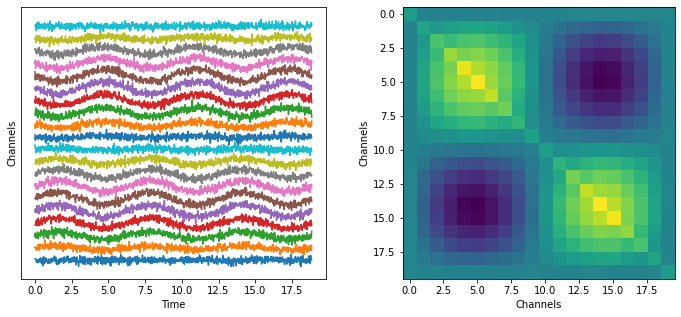

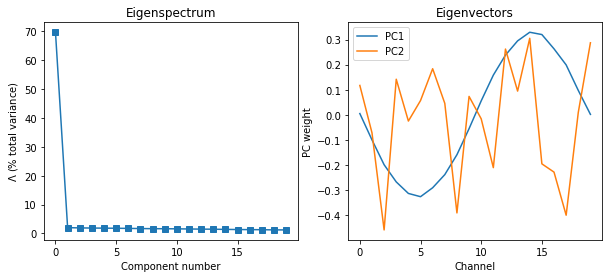

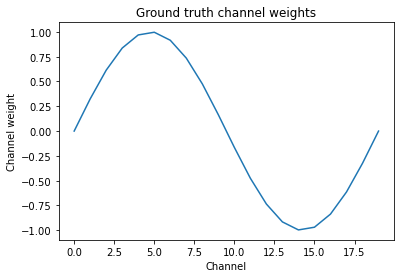

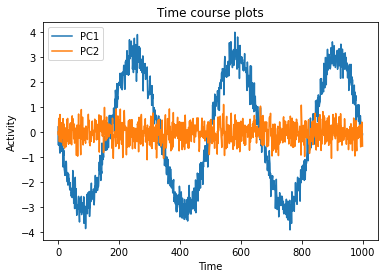

In [6]:
# simulation parameters
N = 1000    # time steps
M =   20    # channels

# time vector (radian units)
t = np.linspace(0, 6*np.pi, N)

# relationship across channels (imposing covariance)
chan_rel = np.sin(np.linspace(0, 2*np.pi, M))

# initialize data
data = np.zeros((M, N))

# create dataset
for i in range(M):
    data[i, :] = np.sin(t) * chan_rel[i]

# add noise
data = data + np.random.randn(M, N)/3
    
# mean-center
for i in range(M):
    data[i, :] = data[i, :] - np.mean(data[i, :])


# compute covariance matrix
cov_mat = data @ data.T / (N-1)
# cov_mat = data.T @ data / (N-1)

### show me the data!!
fig, ax = plt.subplots(1, 2, figsize=(12,5))

# draw time series
for i in range(M):
    ax[0].plot(t, data[i, :] + i*2)
    
ax[0].set_yticks([])
ax[0].set_ylabel('Channels')
ax[0].set_xlabel('Time')

# show covariance matrix
ax[1].imshow(cov_mat)
ax[1].set_ylabel('Channels')
ax[1].set_xlabel('Channels')

plt.show()
print("\n\n")


# eigendecomposition of the covariance matrix
eig_vals, eig_vecs = np.linalg.eig( cov_mat )

# sort eigenvalues and eigenvectors
idx   = np.argsort(eig_vals)[::-1]   
eig_vals = np.real( eig_vals[idx] )
eig_vecs = eig_vecs[:, idx]

# convert eigenvalues to percent variance explained
eig_vals = 100 * eig_vals / np.sum(eig_vals)


# compute component time series
r = 2           # two components
comp_time_series = eig_vecs[:, :r].T @ data

# visualizing and interpretting the results
fig = plt.subplots(121, figsize = (10, 4))

# eigenvalues
plt.subplot(121)
plt.plot(eig_vals,'s-')
plt.xlabel('Component number')
plt.ylabel('$\Lambda$ (% total variance)')
plt.title('Eigenspectrum')

# eigenvectors
plt.subplot(122)
plt.plot(eig_vecs[:, 0], label ='PC1')
plt.plot(eig_vecs[:, 1], label ='PC2')
plt.xlabel('Channel')
plt.ylabel('PC weight')
plt.title('Eigenvectors')
plt.legend()
plt.show()

# original channel modulator
plt.plot(chan_rel)
plt.xlabel('Channel')
plt.ylabel('Channel weight')
plt.title('Ground truth channel weights')
plt.show()

# component time series
plt.plot(comp_time_series[0, :], label='PC1')
plt.plot(comp_time_series[1, :], label='PC2')
plt.xlabel('Time')
plt.ylabel('Activity')
plt.legend()
plt.title('Time course plots')
plt.show()
print("\n\n")

---
## Matrix Definitiveness

* refers to the sign of the matrix's energy landscape 
* Is the quadratic form positive everywhere, negative everywhere or somewhere in the middle?
<br> <br>

Category              | Geometry             | Eigenvalues          | Invertibility
----------------------|----------------------|----------------------|----------------
Positive definite     | Always positive      | All positive         | Definitely
Positive semi-definite| Positive and zero    | All non-negative     | No!
Indefinite            | Positive and negative| Positive and negative| Possible
Negative semi-definite| Negative and zero    | All non-positive     | No!
Negative definite     | Always negative      | All negative         | Definitely

<br>

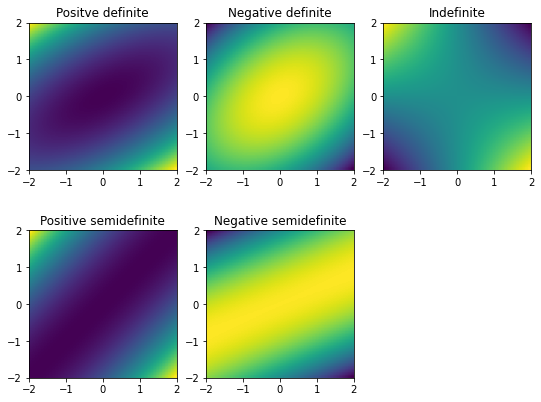

In [11]:
# matrices
S = np.zeros((5,), dtype= object)
S[0] = [ [ 4, 4], [ 4, 9] ]
S[1] = [ [-4,-1], [-3,-5] ]
S[2] = [ [ 0, 1], [ 2, 0] ]
S[3] = [ [ 1, 1], [ 1, 1] ]
S[4] = [ [-1,-2], [-3,-6] ]



# range for vector w
n = 50
wr = 2
w_range = np.linspace(-wr, wr, n)

# initializing the quadratic form matrix
qf = np.zeros( (n, n) )


fig = plt.subplots(1, figsize=(9, 7))

for i in range(5):
    
    # computing QF
    for xi in range(n):
        for yi in range(n):
            # column vector w
            w = np.transpose([ w_range[xi], w_range[yi] ])
            
            # QF
            qf[xi, yi] = w.T @ S[i] @ w
    
    # show the map
    plt.subplot(2, 3, i+1)
    plt.imshow(qf.T, extent=[-wr, wr, -wr, wr])
    
    ## computing the matrix's definiteness based on the eigenvalues
    # get the eigenvalues
    eig_vals = np.linalg.eig(S[i])[0]
    
    # we have to check their signs
    eig_val_sign = np.sign(eig_vals)
    
    # testing for signs (only works for 2 x 2 matrices)
    if sum(eig_val_sign) == 2:
        def_cat = 'Positve definite'
        
    elif sum(eig_val_sign)==1:
        def_cat = 'Positive semidefinite'
        
    elif sum(eig_val_sign)==0:
        def_cat = 'Indefinite'
        
    elif sum(eig_val_sign)==-1:
        def_cat = 'Negative semidefinite'
        
    elif sum(eig_val_sign)==-2:
        def_cat = 'Negative definite'
    
    plt.title(def_cat)

plt.show()
print("\n\n")

### For any matrix A,
* $\;A^T.A$ will always be either positive definite or positive semi-definite
* $\;A.A^T$ will always be either positive definite or positive semi-definite
<br><br>

##### $w^T\;.\;S\;.\;w$
##### = $w^T\;.\;A^T\;.\;A\;.\;w$
##### = $(A\;.\;w)^T\;.\;(A\;.\;w)$
##### = $|A.w|^2\;\;\;\;\;\;\;\;\;\;\;$  (will always be >= 0)
<br>

##### $w^T\;.\;S\;.\;w$
##### = $w^T\;.\;A\;.\;A^T\;.\;w$
##### = $(w^T\;.\;A)\;.\;(w^T\;.\;A)^T$
##### = $|w^T.A|^2\;\;\;\;\;\;\;\;\;\;\;$  (will always be >= 0)
<br>